In [330]:
# Importing modules
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

In [331]:
matplotlib.style.use('fivethirtyeight')

In [332]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [333]:
# Basic information
df.info()

# Shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(506, 14)

In [334]:
# Find the duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates present: {duplicates} ")

Number of duplicates present: 0 


# Column names and meaning

### CRIM: per capita crime rate by town # median
### ZN: proportion of residential land zoned for lots over 25,000 sq.ft. # median
### INDUS: proportion of non-retail business acres per town # TAX 
### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) # Delete
### NOX: nitric oxides concentration (parts per 10 million)
### RM: average number of rooms per dwelling
### AGE: proportion of owner-occupied units built prior to 1940 # median
### DIS: weighted distances to ﬁve Boston employment centers
### RAD: index of accessibility to radial highways
### TAX: full-value property-tax rate per $10,000.
### PTRATIO: pupil-teacher ratio by town 
### B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
### LSTAT: Lower status of the population.
### MEDV: Median value of owner-occupied homes in $1000s


In [335]:
# Renaming Columns
df.rename(columns={'CRIM':'crime_rate'}, inplace=True)
df.rename(columns={'ZN':'zonal_lot'}, inplace=True)
df.rename(columns={'INDUS':'industry_acres'}, inplace=True)
df.rename(columns={'CHAS':'access_to_charles'}, inplace=True)
df.rename(columns={'NOX':'no_concentration'}, inplace=True)
df.rename(columns={'RM':'room_per_house'}, inplace=True)
df.rename(columns={'AGE':'age_building'}, inplace=True)
df.rename(columns={'DIS':'dist_empcenters'}, inplace=True)
df.rename(columns={'RAD':'dist_radhighways'}, inplace=True)
df.rename(columns={'TAX':'tax_rate'}, inplace=True)
df.rename(columns={'PTRATIO':'pup_teach_ratio'}, inplace=True)
df.rename(columns={'B':'black_ppn'}, inplace=True)
df.rename(columns={'LSTAT':'lower_status_ppn'}, inplace=True)
df.rename(columns={'MEDV':'med_house_price'}, inplace=True)

In [336]:
# Find null values
df.isnull().sum()

crime_rate           20
zonal_lot            20
industry_acres       20
access_to_charles    20
no_concentration      0
room_per_house        0
age_building         20
dist_empcenters       0
dist_radhighways      0
tax_rate              0
pup_teach_ratio       0
black_ppn             0
lower_status_ppn     20
med_house_price       0
dtype: int64

In [337]:
# Statistics of the numerical values
df.describe().round(2)

,crime_rate,zonal_lot,industry_acres,access_to_charles,no_concentration,room_per_house,age_building,dist_empcenters,dist_radhighways,tax_rate,pup_teach_ratio,black_ppn,lower_status_ppn,med_house_price
count,486.00,486.00,486.00,486.00,506.00,506.00,486.00,506.00,506.00,506.00,506.00,506.00,486.00,506.00
mean,3.61,11.21,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.72,23.39,6.84,0.26,0.12,0.70,28.00,2.11,8.71,168.54,2.16,91.29,7.16,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.18,2.10,4.00,279.00,17.40,375.38,7.12,17.02
50%,0.25,0.00,9.69,0.00,0.54,6.21,76.80,3.21,5.00,330.00,19.05,391.44,11.43,21.20
75%,3.56,12.50,18.10,0.00,0.62,6.62,93.98,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [338]:
# Missing Values
df["crime_rate"] = df["crime_rate"].fillna(df["crime_rate"].median())
df["zonal_lot"] = df["zonal_lot"].fillna(df["zonal_lot"].median())
df["industry_acres"] = df["industry_acres"].fillna(df["industry_acres"].mean())
df["access_to_charles"] = df["access_to_charles"].fillna(0)
df["age_building"] = df["age_building"].fillna(df["age_building"].mean())
df["lower_status_ppn"] = df["lower_status_ppn"].fillna(df["lower_status_ppn"].mean())

In [339]:
# Check for any missing values
df.isnull().sum()

crime_rate           0
zonal_lot            0
industry_acres       0
access_to_charles    0
no_concentration     0
room_per_house       0
age_building         0
dist_empcenters      0
dist_radhighways     0
tax_rate             0
pup_teach_ratio      0
black_ppn            0
lower_status_ppn     0
med_house_price      0
dtype: int64

In [340]:
# Statistics of the numerical values post filling missing values
df.describe().round(2)

,crime_rate,zonal_lot,industry_acres,access_to_charles,no_concentration,room_per_house,age_building,dist_empcenters,dist_radhighways,tax_rate,pup_teach_ratio,black_ppn,lower_status_ppn,med_house_price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.48,10.77,11.08,0.07,0.55,6.28,68.52,3.80,9.55,408.24,18.46,356.67,12.72,22.53
std,8.57,23.03,6.70,0.25,0.12,0.70,27.44,2.11,8.71,168.54,2.16,91.29,7.01,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.92,2.10,4.00,279.00,17.40,375.38,7.23,17.02
50%,0.25,0.00,9.90,0.00,0.54,6.21,74.45,3.21,5.00,330.00,19.05,391.44,12.00,21.20
75%,2.81,0.00,18.10,0.00,0.62,6.62,93.57,5.19,24.00,666.00,20.20,396.22,16.57,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

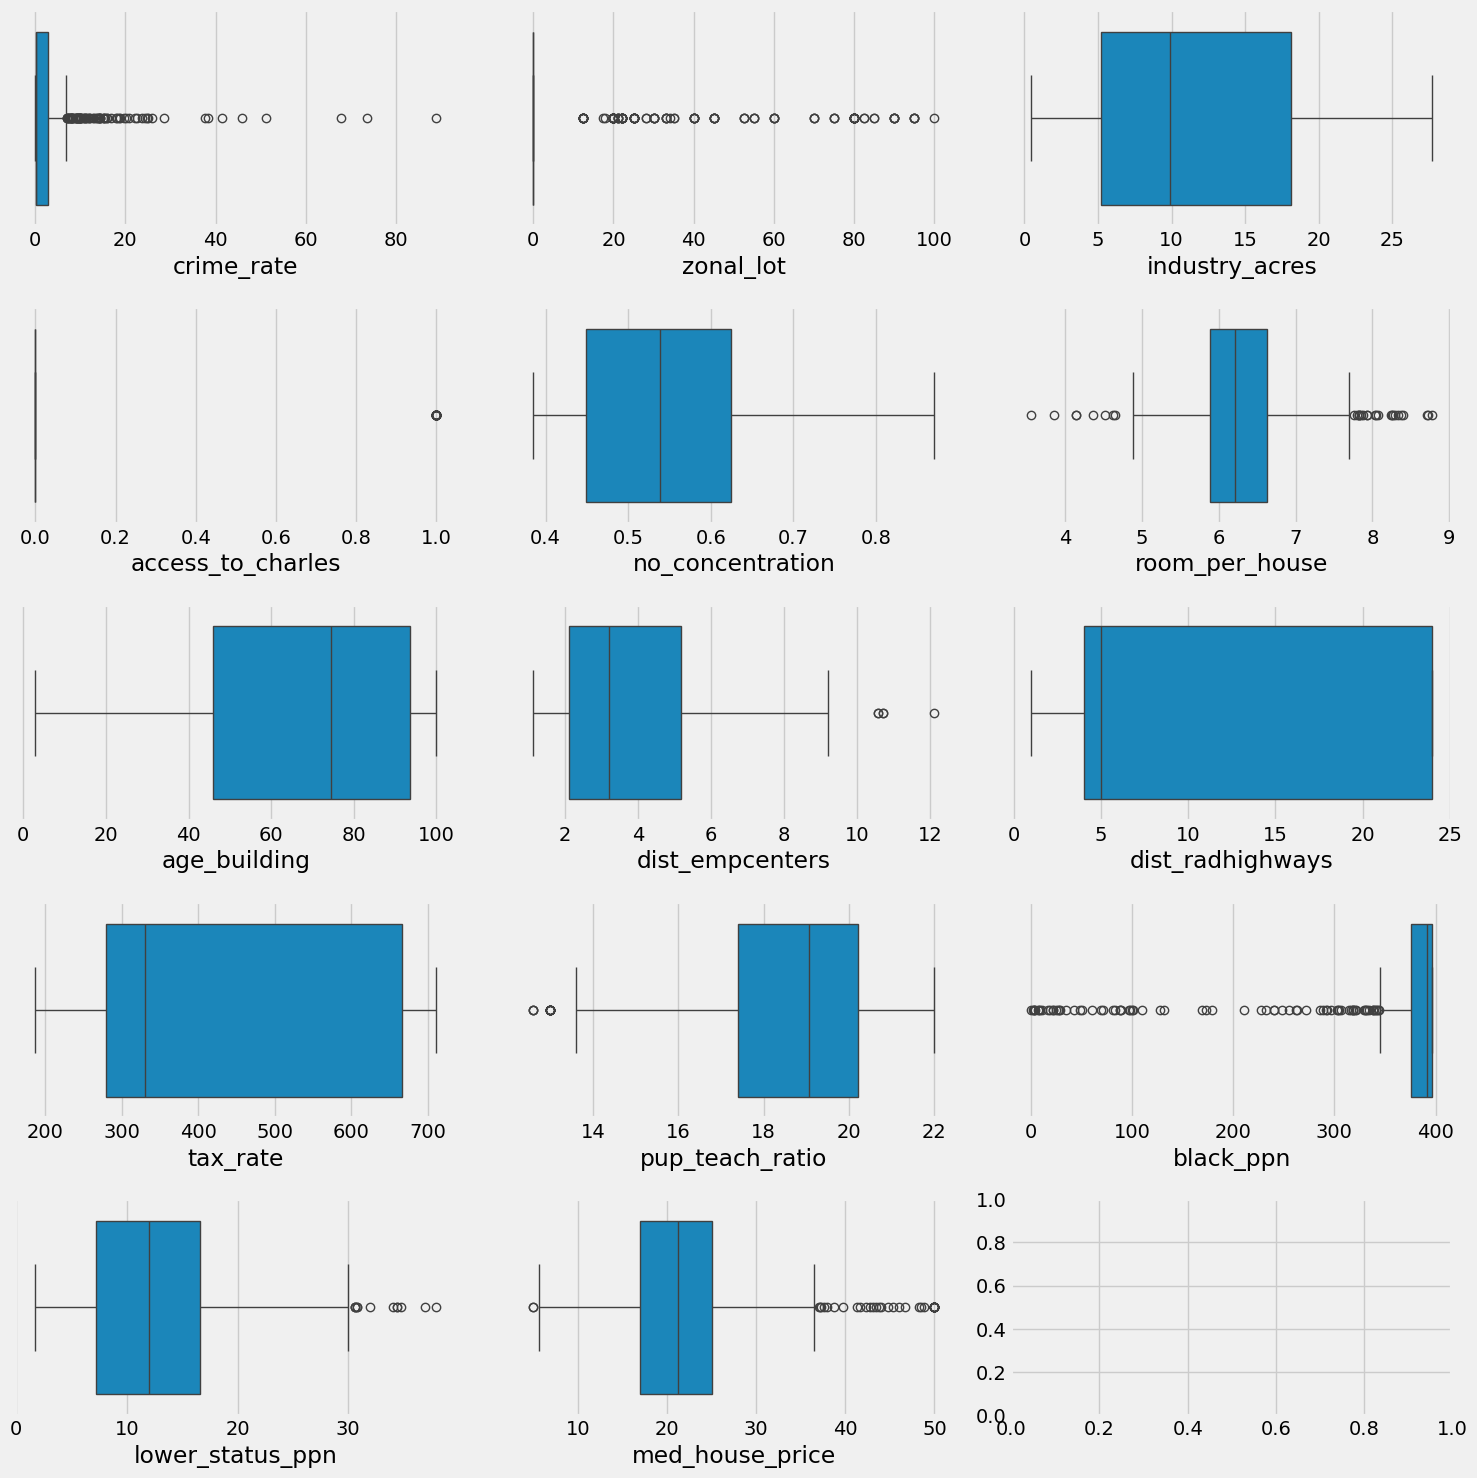

In [341]:
# Boxplot for every numerical column
# Create a figure and a set of subplots with as many rows as needed and 3 columns
rows = (len(df.columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15,15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

In [342]:
# Removing Outliers
outliers = df.quantile(.98) # dealing with the outliers seen in the boxplots above
df = df[(df['crime_rate']<outliers['crime_rate'])]
df = df[(df['zonal_lot']<outliers['zonal_lot'])]

In [343]:
df.describe().round(2)

,crime_rate,zonal_lot,industry_acres,access_to_charles,no_concentration,room_per_house,age_building,dist_empcenters,dist_radhighways,tax_rate,pup_teach_ratio,black_ppn,lower_status_ppn,med_house_price
count,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00
mean,2.56,9.00,11.15,0.07,0.56,6.28,68.92,3.75,9.37,405.65,18.47,359.01,12.68,22.49
std,4.71,19.65,6.62,0.25,0.11,0.69,27.00,2.02,8.58,166.35,2.16,87.42,6.79,8.80
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,188.00,12.60,0.32,1.73,6.30
25%,0.09,0.00,5.64,0.00,0.45,5.89,47.80,2.11,4.00,279.50,17.40,375.70,7.41,17.20
50%,0.25,0.00,9.90,0.00,0.54,6.20,74.50,3.20,5.00,330.00,19.10,391.45,12.03,21.20
75%,2.41,0.00,18.10,0.00,0.62,6.60,93.45,5.10,16.00,666.00,20.20,396.24,16.43,25.00
max,24.80,82.50,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,37.97,50.00


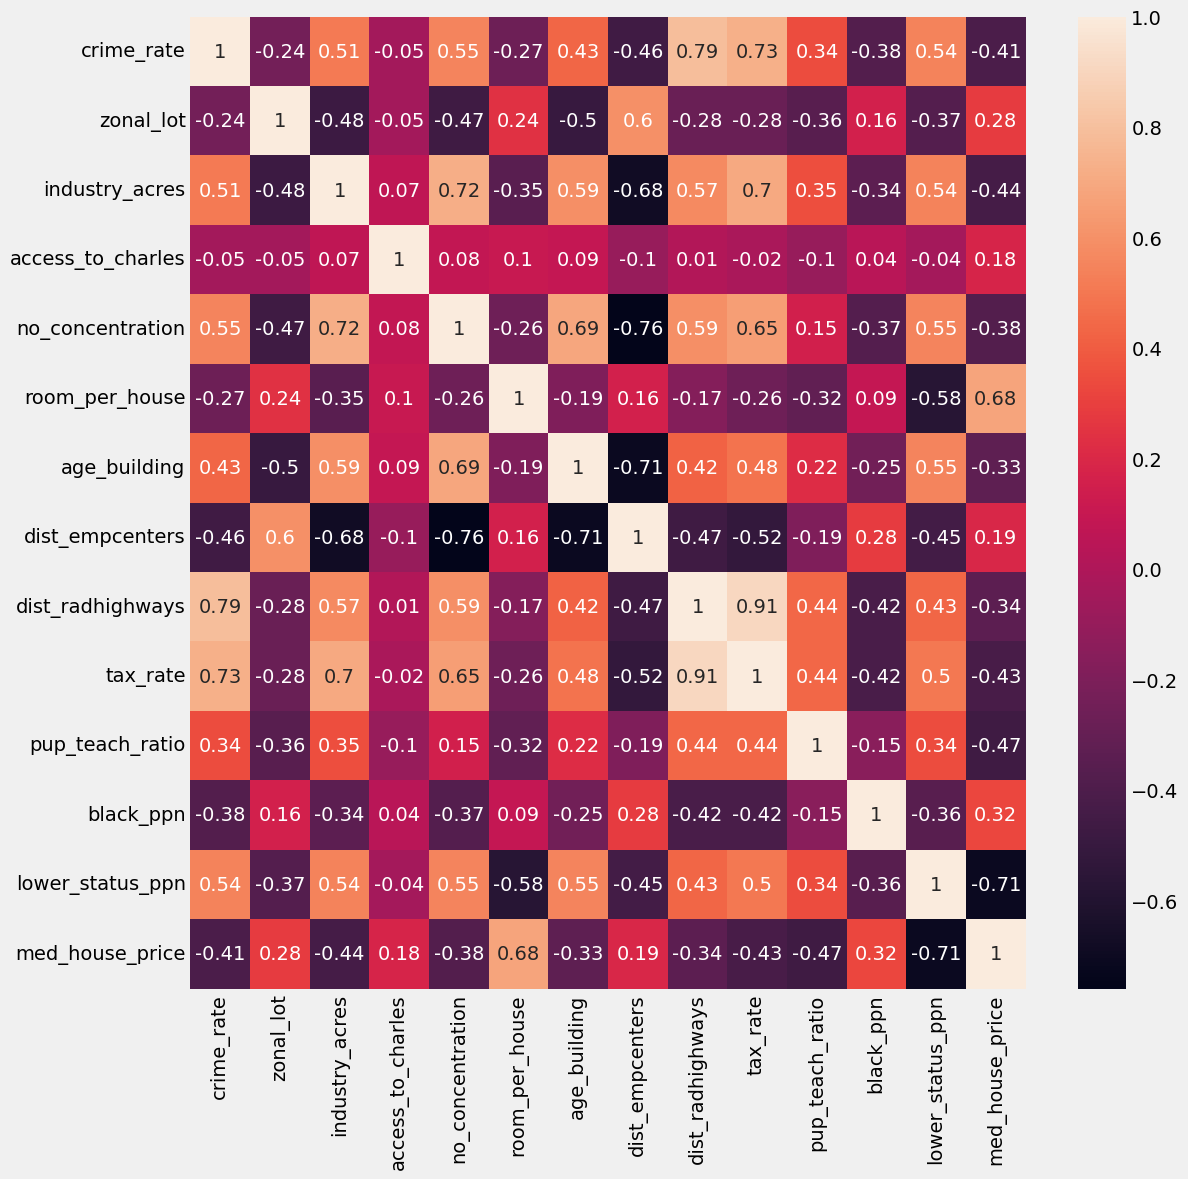

In [344]:
# Correlation Matrix
matrix = df.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(matrix, annot=True)
plt.show()

In [345]:
target_correlation = matrix["med_house_price"].sort_values(ascending=False)
print(target_correlation)

med_house_price      1.00
room_per_house       0.68
black_ppn            0.32
zonal_lot            0.28
dist_empcenters      0.19
access_to_charles    0.18
age_building        -0.33
dist_radhighways    -0.34
no_concentration    -0.38
crime_rate          -0.41
tax_rate            -0.43
industry_acres      -0.44
pup_teach_ratio     -0.47
lower_status_ppn    -0.71
Name: med_house_price, dtype: float64


C:\Users\aayus\AppData\Local\Temp\ipykernel_13744\576061735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_correlation_df, x='Correlation', y='Feature', palette='coolwarm')
c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

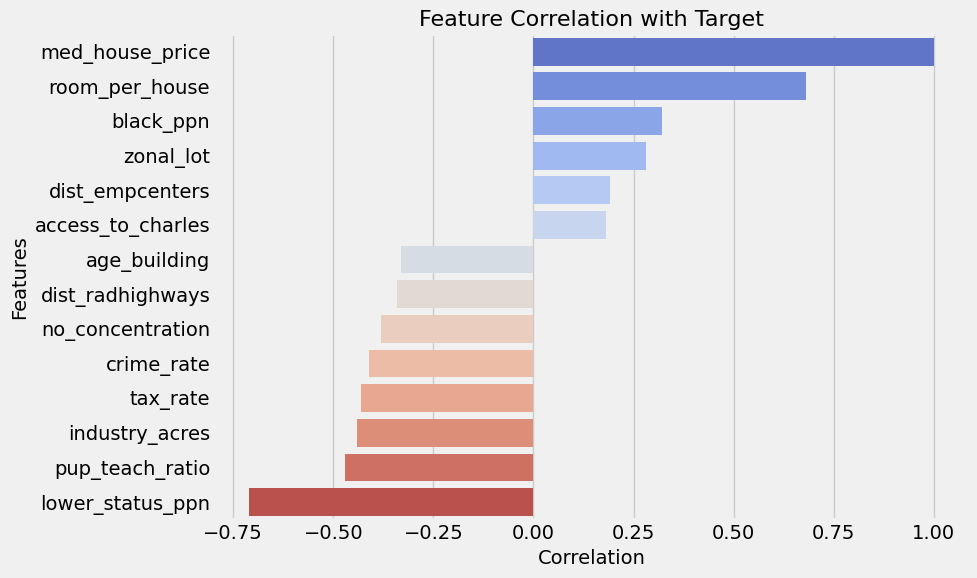

In [346]:
target_correlation_df = target_correlation.reset_index()
target_correlation_df.columns = ['Feature', 'Correlation']

plt.figure(figsize=(10, 6))
sns.barplot(data=target_correlation_df, x='Correlation', y='Feature', palette='coolwarm')

plt.title('Feature Correlation with Target', fontsize=16)
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.tight_layout()
plt.show()

In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time


In [348]:
x = df[['lower_status_ppn','pup_teach_ratio','industry_acres','tax_rate','crime_rate','room_per_house']].values
y = df['med_house_price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

In [349]:
# Running The Linear regression model
start_time = time.time()
lr_regression = LinearRegression()
lr_regression = lr_regression.fit(x_train, y_train)
end_time = time.time()
lr_time = (end_time - start_time)
print(f"Time taken to train Linear Regression model : {lr_time} seconds")
y_pred_lr = lr_regression.predict(x_test).round(2)

# Generating prediction for Linear Regression model
predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_lr.flatten()})
predictions.head(10)

Time taken to train Linear Regression model : 0.0010001659393310547 seconds


,Actual,Predicted
0,18.5,19.35
1,19.3,19.86
2,11.7,15.24
3,23.9,26.76
4,21.5,24.71
5,13.5,14.75
6,34.9,32.52
7,12.7,16.89
8,20.8,18.33
9,19.4,25.57


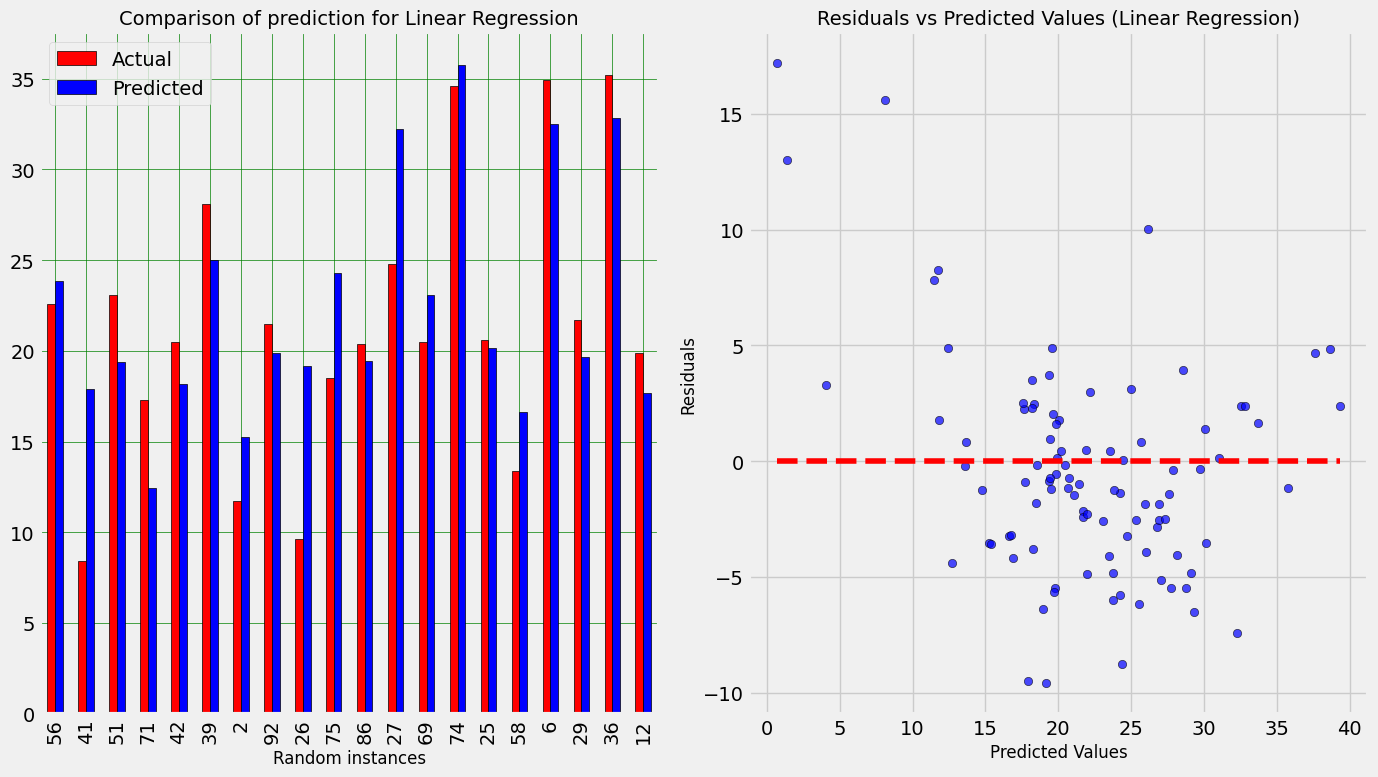

In [350]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for Linear Regression", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_lr.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_lr), xmax=max(y_pred_lr), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (Linear Regression)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [351]:
#Getting The R Squared Value
lr_score = ((r2_score(y_test, y_pred_lr))*100).round(3)
print(lr_score)

55.528


In [352]:
# Running the Decision Tree Regressor
start_time = time.time()
dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
dt_time = (end_time - start_time)
print(f"Time taken to train Decision Tree Regressor model : {dt_time} seconds")
y_pred_dt = dt_regression.predict(x_test).round(2)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_dt.flatten()})
predictions.head(10)

Time taken to train Decision Tree Regressor model : 0.004999399185180664 seconds


,Actual,Predicted
0,18.5,20.0
1,19.3,19.2
2,11.7,13.8
3,23.9,20.6
4,21.5,23.8
5,13.5,11.0
6,34.9,33.4
7,12.7,13.8
8,20.8,12.3
9,19.4,22.0


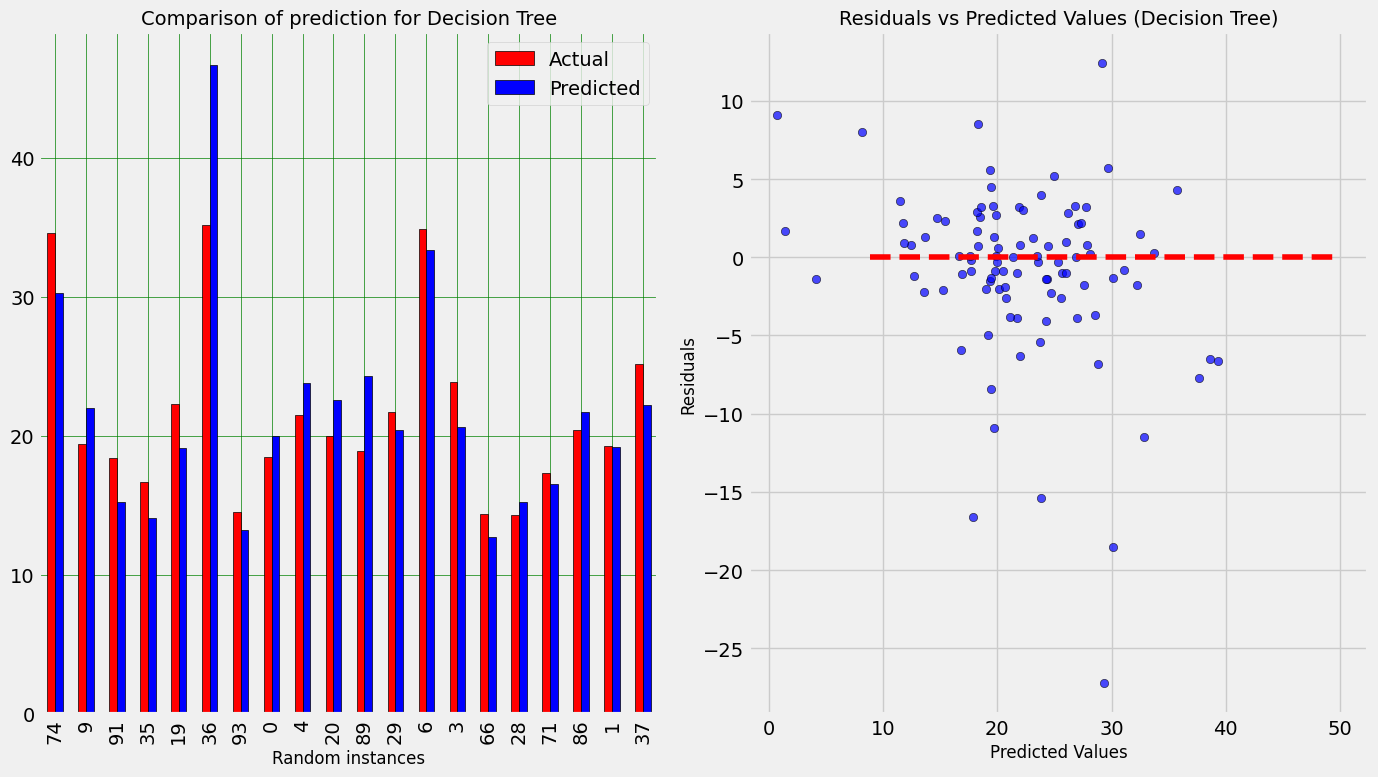

In [353]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for Decision Tree", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_dt.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_dt), xmax=max(y_pred_dt), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (Decision Tree)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [354]:
#Getting The R Squared Value
dt_score = ((r2_score(y_test, y_pred_dt))*100).round(3)
print(dt_score)

36.43


In [355]:
# Running the Decision Tree Regressor
start_time = time.time()
dt_regression = RandomForestRegressor()
dt_regression = dt_regression.fit(x_train, y_train)
end_time = time.time()
rf_time = (end_time - start_time)
print(f"Time taken to train Random Forest Regressor model : {rf_time} seconds")
y_pred_rf = dt_regression.predict(x_test).round(2)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_rf.flatten()})
predictions.head(10)

Time taken to train Random Forest Regressor model : 0.41284799575805664 seconds


,Actual,Predicted
0,18.5,20.08
1,19.3,19.74
2,11.7,14.30
3,23.9,21.47
4,21.5,21.34
5,13.5,14.74
6,34.9,33.62
7,12.7,14.62
8,20.8,20.52
9,19.4,20.15


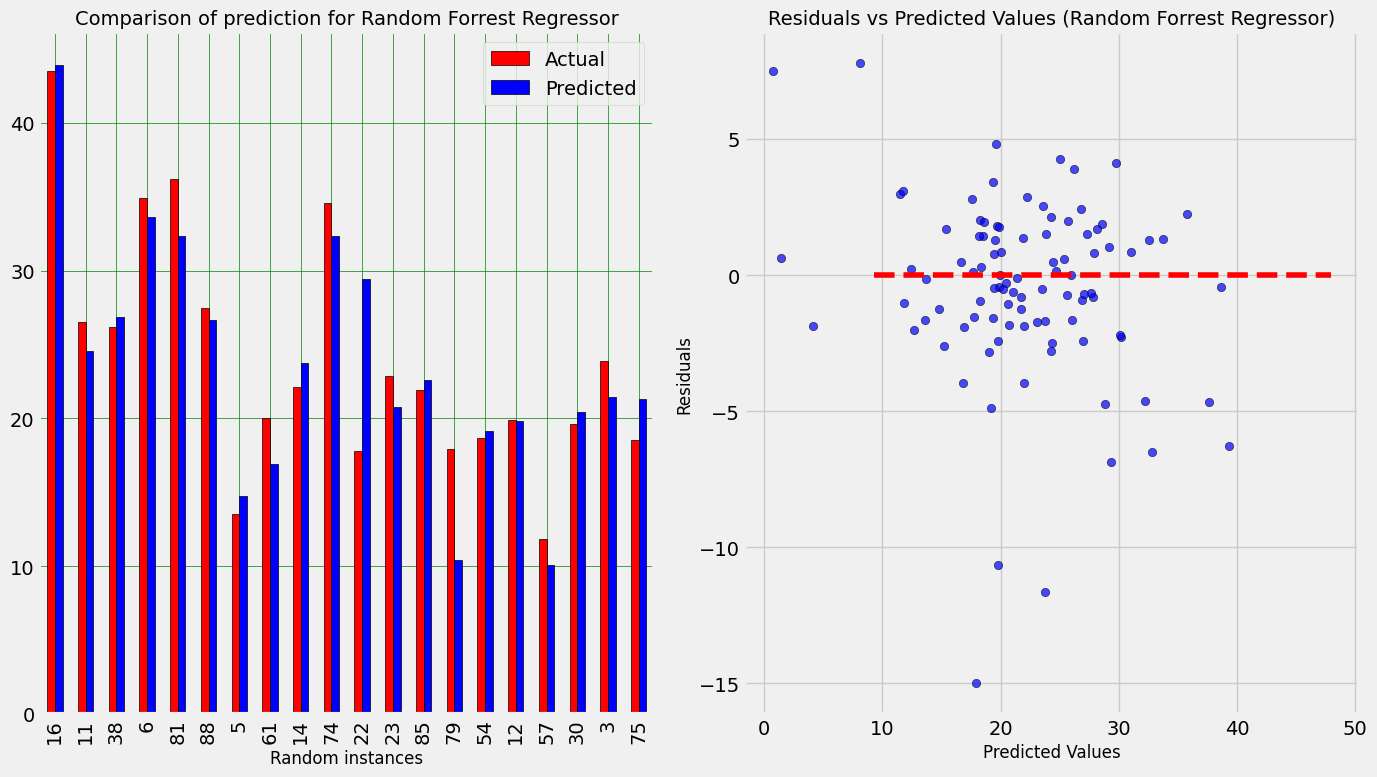

In [356]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for Random Forrest Regressor", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_rf.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (Random Forrest Regressor)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [357]:
#Getting The R Squared Value
rf_score = ((r2_score(y_test, y_pred_rf))*100).round(3)
print(rf_score)

76.508


In [358]:
# Running The GradientBoostRegressor model
start_time = time.time()
gb_regression = GradientBoostingRegressor()
gb_regression = gb_regression.fit(x_train, y_train)
end_time = time.time()
gb_time = (end_time - start_time)
print(f"Time taken to train GradientBoost Regressor model : {gb_time} seconds")
y_pred_gb = gb_regression.predict(x_test).round(2)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_gb.flatten()})
predictions.head(10)


Time taken to train GradientBoost Regressor model : 0.14412784576416016 seconds


,Actual,Predicted
0,18.5,20.12
1,19.3,20.30
2,11.7,14.72
3,23.9,24.18
4,21.5,21.38
5,13.5,13.79
6,34.9,33.06
7,12.7,16.46
8,20.8,19.86
9,19.4,20.22


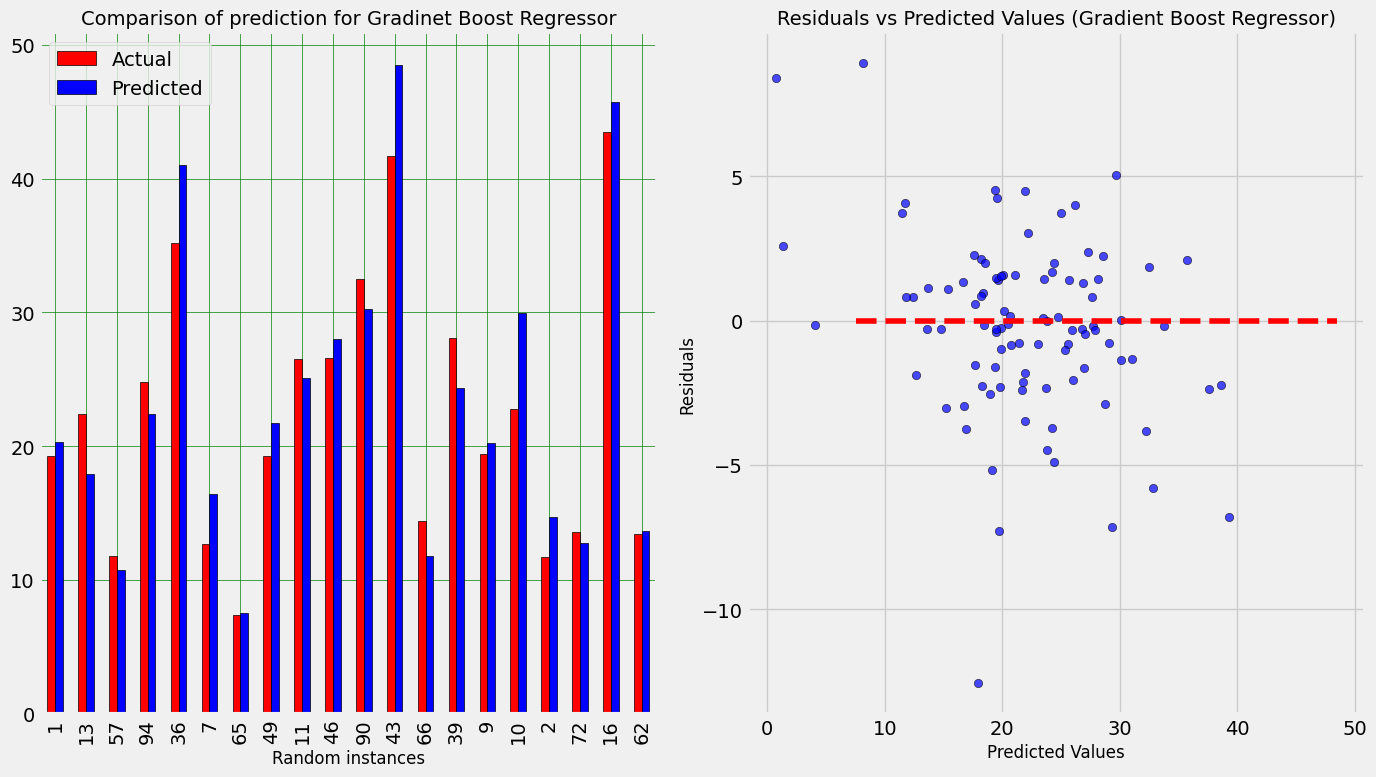

In [359]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for Gradinet Boost Regressor", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_gb.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_gb), xmax=max(y_pred_gb), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (Gradient Boost Regressor)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [360]:
#Getting The R Squared Value
gb_score = ((r2_score(y_test, y_pred_gb))*100).round(3)
print(gb_score)

80.339


In [361]:
# Running The GradientBoostRegressor model
start_time = time.time()
ada_regression = AdaBoostRegressor()
ada_regression = ada_regression.fit(x_train, y_train)
end_time = time.time()
ada_time = (end_time - start_time)
print(f"Time taken to train ADA Boost Regressor model : {ada_time} seconds")
y_pred_ada = ada_regression.predict(x_test).round(2)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})
predictions.head(10)

Time taken to train ADA Boost Regressor model : 0.10855340957641602 seconds


,Actual,Predicted
0,18.5,20.58
1,19.3,19.83
2,11.7,18.31
3,23.9,25.72
4,21.5,19.83
5,13.5,16.50
6,34.9,33.19
7,12.7,18.62
8,20.8,21.12
9,19.4,23.32


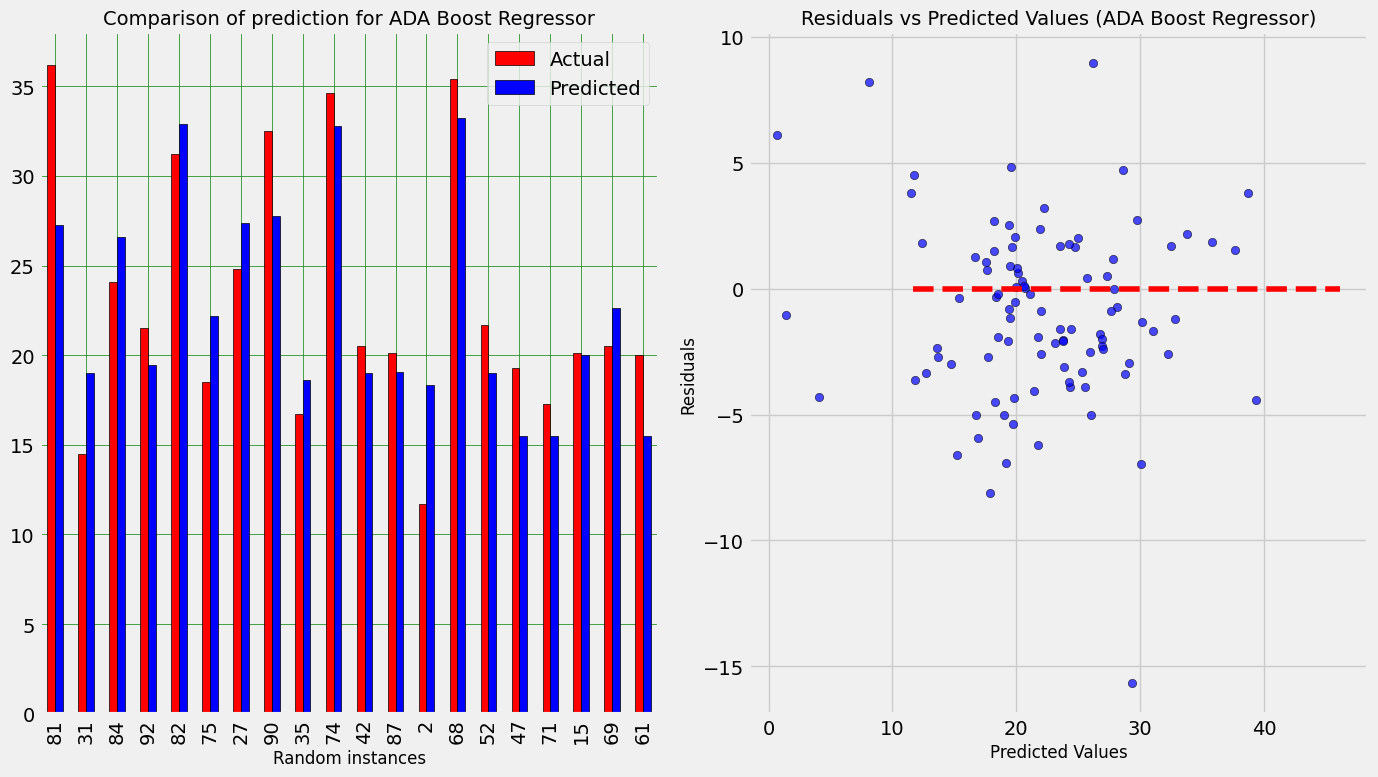

In [362]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for ADA Boost Regressor", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_ada.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_ada), xmax=max(y_pred_ada), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (ADA Boost Regressor)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [363]:
#Getting The R Squared Value
ada_score = ((r2_score(y_test, y_pred_ada))*100).round(3)
print(ada_score)

72.813


In [364]:
# Running The XGBRegressor model
start_time = time.time()
xgb_regression = XGBRegressor(objective ='reg:squarederror')
xgb_regression = xgb_regression.fit(x_train, y_train)
end_time = time.time()
xgb_time = (end_time - start_time)
print(f"Time taken to train XGBoost Regressor model : {xgb_time} seconds")

y_pred_xgb = xgb_regression.predict(x_test).round(2)

predictions = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_xgb.flatten()})
predictions.head(10)

Time taken to train XGBoost Regressor model : 0.06950736045837402 seconds


,Actual,Predicted
0,18.5,20.799999
1,19.3,19.410000
2,11.7,15.180000
3,23.9,24.430000
4,21.5,22.350000
5,13.5,14.170000
6,34.9,35.230000
7,12.7,13.670000
8,20.8,20.770000
9,19.4,20.070000


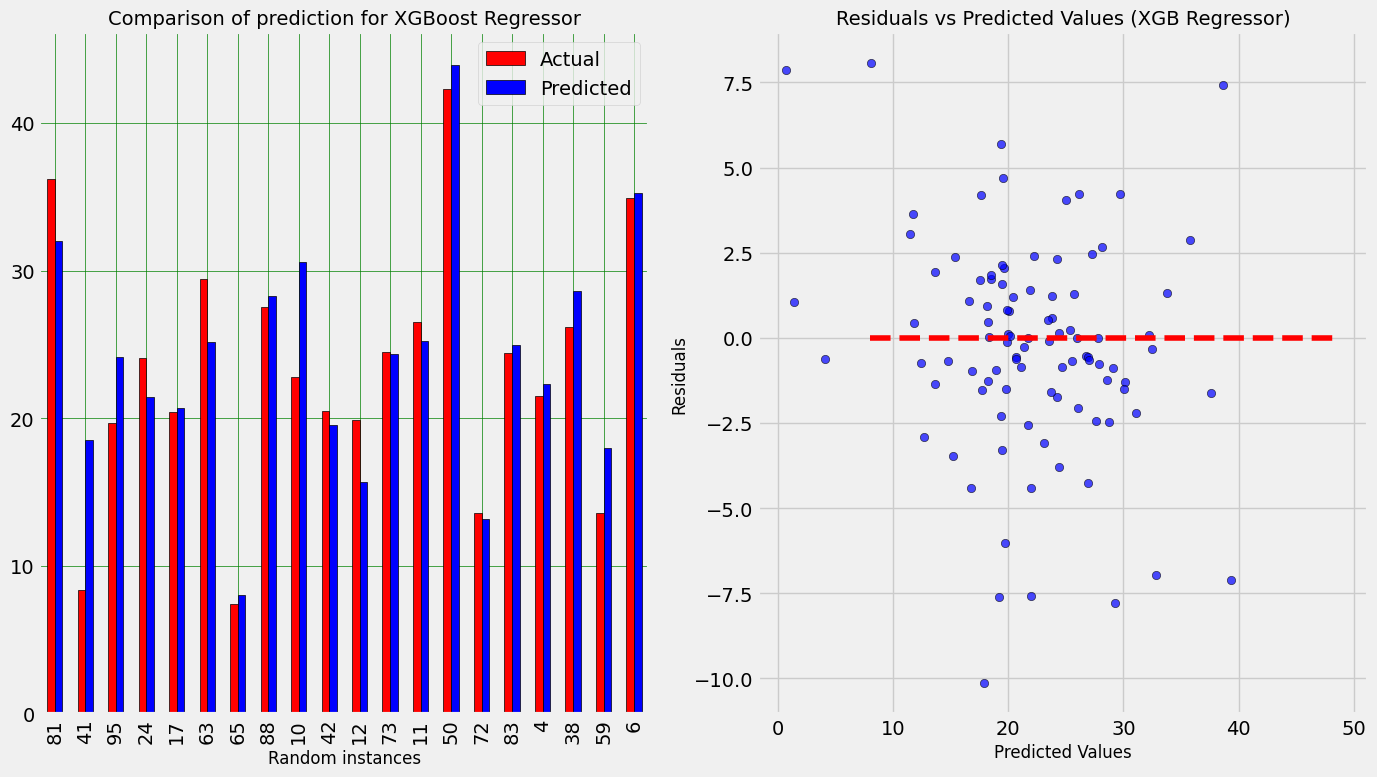

In [365]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

# Plot 1: Bar plot for random sample predictions
predictions.sample(20).plot(kind='bar', ax=ax[0], color=['red','blue'], edgecolor='black', figsize=(14, 8))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='green')
ax[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0].set_xlabel("Random instances", fontsize=12)
ax[0].set_title("Comparison of prediction for XGBoost Regressor", fontsize=14)

# Plot 2: Residuals vs Predicted Values plot
residuals = y_test.flatten() - y_pred_xgb.flatten()
ax[1].scatter(y_pred_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
ax[1].hlines(y=0, xmin=min(y_pred_xgb), xmax=max(y_pred_xgb), colors='red', linestyle='--')
ax[1].set_title('Residuals vs Predicted Values (XGB Regressor)', fontsize=14)
ax[1].set_xlabel('Predicted Values', fontsize=12)
ax[1].set_ylabel('Residuals', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [366]:
#Getting The R Squared Value
xgb_score = ((r2_score(y_test, y_pred_xgb))*100).round(3)
print(xgb_score)

79.23


In [367]:
r2 = [lr_score, dt_score, rf_score, gb_score, ada_score, xgb_score]
tm = [lr_time, dt_time, rf_time, gb_time, ada_time, xgb_time]
comp = pd.DataFrame({'Time': tm, 'Accu': r2})

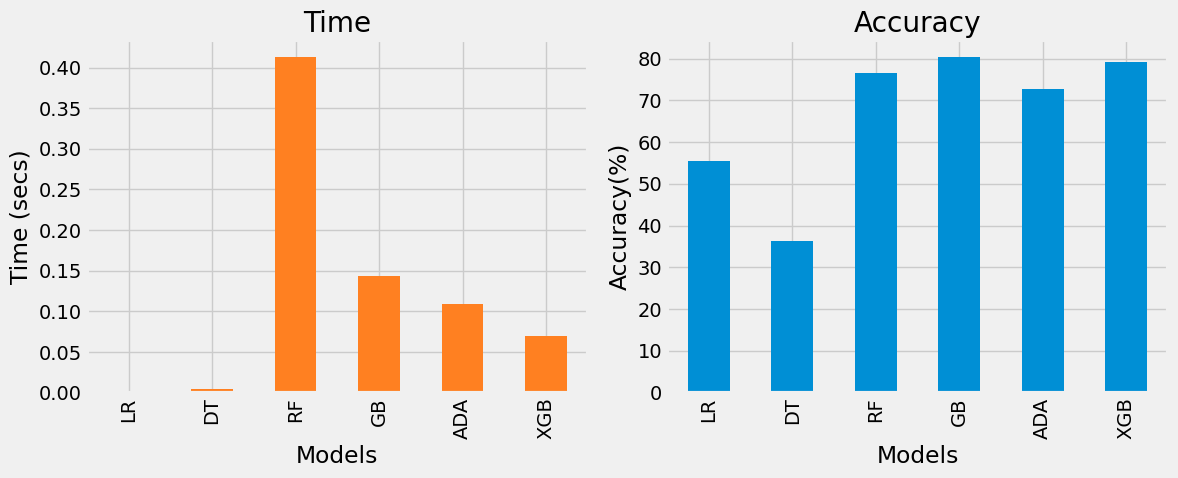

In [368]:
# Comparing All models based on time taken to implement and Accuracy

label = ['LR', 'DT','RF', 'GB', 'ADA', 'XGB']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = comp['Time'].plot(kind='bar',title="Time",ax=axes[0],color = (1, 0.5, 0.13))
ax1 = comp['Accu'].plot(kind='bar',title="Accuracy",ax=axes[1])
ax.set_ylabel("Time (secs)")
ax.set_xlabel('Models')
ax.set_xticklabels(label)
ax1.set_ylabel("Accuracy(%)")
ax1.set_xlabel('Models')
ax1.set_xticklabels(label)
fig.tight_layout()